In [4483]:
# importing necessary packages
import warnings
warnings.filterwarnings('ignore')

# import pandas and numpy
import pandas as pd
#increase max row and column display value
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.set_option('display.width', 1000)

import numpy as np
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4484]:
# reading data dictionary
data_dictionary = pd.read_csv('data_dictionary.csv')
data_dictionary.head(100)

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


# Reading and understanding the data

In [4485]:
# reading data
data = pd.read_csv('train.csv')
data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [4486]:
# check the dimension of dataframe
data.shape

(69999, 172)

In [4487]:
# have a look on length columns
column_list = data.columns.tolist()
print(len(column_list))

172


In [4488]:
# info of dataframe
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

- Above indicate some column has object values
- Those columns can be brough to resepective datatype

In [4489]:
# Statistical analysis of data of numerical values
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,69999.0,34999.000000,20207.115084,0.000,17499.5000,34999.000,52498.5000,69998.000
circle_id,69999.0,109.000000,0.000000,109.000,109.0000,109.000,109.0000,109.000
loc_og_t2o_mou,69297.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
std_og_t2o_mou,69297.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
loc_ic_t2o_mou,69297.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
arpu_6,69999.0,283.134365,334.213918,-2258.709,93.5810,197.484,370.7910,27731.088
arpu_7,69999.0,278.185912,344.366927,-1289.715,86.7140,191.588,365.3695,35145.834
arpu_8,69999.0,278.858826,351.924315,-945.808,84.0950,192.234,369.9090,33543.624
onnet_mou_6,67231.0,133.153275,299.963093,0.000,7.4100,34.110,119.3900,7376.710
onnet_mou_7,67312.0,133.894438,311.277193,0.000,6.6750,32.280,115.8375,8157.780


# Data Cleaning

## Handling null,  missing values, unique values, data type conversions

### Handling null,  missing values

In [4490]:
# Check null value count in each columns with descending order
data.isnull().sum().sort_values(ascending=False)

date_of_last_rech_data_6    52431
av_rech_amt_data_6          52431
arpu_2g_6                   52431
count_rech_2g_6             52431
count_rech_3g_6             52431
total_rech_data_6           52431
arpu_3g_6                   52431
max_rech_data_6             52431
fb_user_6                   52431
night_pck_user_6            52431
av_rech_amt_data_7          52134
count_rech_2g_7             52134
night_pck_user_7            52134
max_rech_data_7             52134
total_rech_data_7           52134
date_of_last_rech_data_7    52134
count_rech_3g_7             52134
arpu_3g_7                   52134
arpu_2g_7                   52134
fb_user_7                   52134
count_rech_3g_8             51582
fb_user_8                   51582
arpu_3g_8                   51582
count_rech_2g_8             51582
date_of_last_rech_data_8    51582
av_rech_amt_data_8          51582
total_rech_data_8           51582
night_pck_user_8            51582
arpu_2g_8                   51582
max_rech_data_

In [4491]:
# finding percentage of null values
null_percentage = pd.DataFrame(round(data.isnull().sum()/len(data.index)*100,2).sort_values(ascending=False),columns=["Null values in %"])
null_percentage

,Null values in %
date_of_last_rech_data_6,74.90
av_rech_amt_data_6,74.90
arpu_2g_6,74.90
count_rech_2g_6,74.90
count_rech_3g_6,74.90
total_rech_data_6,74.90
arpu_3g_6,74.90
max_rech_data_6,74.90
fb_user_6,74.90
night_pck_user_6,74.90


- From above we can see lot of columns has missing values more than 70%
- We need to treat missing values

In [4492]:
# columns with null values more than 70%
null_percentage_greater_70 =  null_percentage[null_percentage['Null values in %'] > 70]
null_percentage_greater_70

,Null values in %
date_of_last_rech_data_6,74.90
av_rech_amt_data_6,74.90
arpu_2g_6,74.90
count_rech_2g_6,74.90
count_rech_3g_6,74.90
total_rech_data_6,74.90
arpu_3g_6,74.90
max_rech_data_6,74.90
fb_user_6,74.90
night_pck_user_6,74.90


In [4493]:
# Dealing with missing values in relation to attributes related to data "rech" (recharge) related 
selected_missing_value_columns = null_percentage_greater_70.index.to_list()
rech_missing_columns = list(filter(lambda x: 'rech' in x , selected_missing_value_columns))
rech_missing_columns

['date_of_last_rech_data_6',
 'av_rech_amt_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'av_rech_amt_data_7',
 'count_rech_2g_7',
 'max_rech_data_7',
 'total_rech_data_7',
 'date_of_last_rech_data_7',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_2g_8',
 'date_of_last_rech_data_8',
 'av_rech_amt_data_8',
 'total_rech_data_8',
 'max_rech_data_8']

In [4494]:
# describe recharge columns
data[rech_missing_columns].describe(include='all')

,date_of_last_rech_data_6,av_rech_amt_data_6,count_rech_2g_6,count_rech_3g_6,total_rech_data_6,max_rech_data_6,av_rech_amt_data_7,count_rech_2g_7,max_rech_data_7,total_rech_data_7,date_of_last_rech_data_7,count_rech_3g_7,count_rech_3g_8,count_rech_2g_8,date_of_last_rech_data_8,av_rech_amt_data_8,total_rech_data_8,max_rech_data_8
count,17568,17568.000000,17568.000000,17568.000000,17568.000000,17568.000000,17865.000000,17865.000000,17865.000000,17865.000000,17865,17865.000000,18417.000000,18417.000000,18417,18417.000000,18417.000000,18417.000000
unique,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,NaN,NaN,NaN,31,NaN,NaN,NaN
top,6/30/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/31/2014,NaN,NaN,NaN,8/31/2014,NaN,NaN,NaN
freq,1317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1282,NaN,NaN,NaN,1388,NaN,NaN,NaN
mean,NaN,192.831096,1.865323,0.602288,2.467612,126.500000,201.455940,2.056311,126.402071,2.679989,NaN,0.623678,0.636423,2.016018,NaN,196.815792,2.652441,125.374925
std,NaN,190.623115,2.566377,1.279297,2.794610,109.352573,198.346141,2.799916,109.459266,3.073472,NaN,1.401230,1.457058,2.728246,NaN,192.280532,3.101265,109.648799
min,NaN,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000
25%,NaN,82.000000,1.000000,0.000000,1.000000,25.000000,92.000000,1.000000,25.000000,1.000000,NaN,0.000000,0.000000,1.000000,NaN,84.000000,1.000000,25.000000
50%,NaN,154.000000,1.000000,0.000000,1.000000,145.000000,154.000000,1.000000,145.000000,2.000000,NaN,0.000000,0.000000,1.000000,NaN,154.000000,1.000000,145.000000
75%,NaN,252.000000,2.000000,1.000000,3.000000,177.000000,252.000000,2.000000,177.000000,3.000000,NaN,1.000000,1.000000,2.000000,NaN,252.000000,3.000000,179.000000


- A new feature, total_rech_amt_data, can be generated by combining total_rech_data and av_rech_amt_data to represent the amount of data utilized by the customer.

- In cases where there are NA values, the minimum value of 1 can be used to impute these values as 0, assuming that no recharges were made by the customer.

In [4495]:
# Furthermore, it has been noticed that both the recharge date and the recharge value are absent simultaneously, indicating that the customer has not performed a recharge.
data.loc[data.total_rech_data_6.isnull() & data.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

,total_rech_data_6,date_of_last_rech_data_6
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
8,NaN,NaN
9,NaN,NaN
11,NaN,NaN
12,NaN,NaN


In [4496]:
# Furthermore, it has been noticed that both the recharge date and the recharge value are absent simultaneously, indicating that the customer has not performed a recharge.
data.loc[data.total_rech_data_6.isnull() & data.date_of_last_rech_data_6.isnull(), ["total_rech_data_7", "date_of_last_rech_data_7"]].head(20)

,total_rech_data_7,date_of_last_rech_data_7
0,NaN,NaN
1,1.0,7/8/2014
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
8,NaN,NaN
9,NaN,NaN
11,NaN,NaN
12,NaN,NaN


In [4497]:
# Furthermore, it has been noticed that both the recharge date and the recharge value are absent simultaneously, indicating that the customer has not performed a recharge.
data.loc[data.total_rech_data_6.isnull() & data.date_of_last_rech_data_6.isnull(), ["total_rech_data_8", "date_of_last_rech_data_8"]].head(20)

,total_rech_data_8,date_of_last_rech_data_8
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
8,NaN,NaN
9,NaN,NaN
11,NaN,NaN
12,NaN,NaN


In [4498]:
rech_missing_columns

['date_of_last_rech_data_6',
 'av_rech_amt_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'av_rech_amt_data_7',
 'count_rech_2g_7',
 'max_rech_data_7',
 'total_rech_data_7',
 'date_of_last_rech_data_7',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_2g_8',
 'date_of_last_rech_data_8',
 'av_rech_amt_data_8',
 'total_rech_data_8',
 'max_rech_data_8']

- In the recharge variables where the minimum value is 1, we have the option to replace missing values with zeros as it indicates that the customer did not recharge their number during that month.

In [4499]:
# Generate a list of recharge columns in which we will replace any missing values with zeroes.
impute_zero = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']
data[impute_zero].describe()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000
mean,2.467612,2.679989,2.652441,192.831096,201.455940,196.815792,126.500000,126.402071,125.374925
std,2.794610,3.073472,3.101265,190.623115,198.346141,192.280532,109.352573,109.459266,109.648799
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,82.000000,92.000000,84.000000,25.000000,25.000000,25.000000
50%,1.000000,2.000000,1.000000,154.000000,154.000000,154.000000,145.000000,145.000000,145.000000
75%,3.000000,3.000000,3.000000,252.000000,252.000000,252.000000,177.000000,177.000000,179.000000
max,61.000000,54.000000,60.000000,5920.000000,4365.000000,4076.000000,1555.000000,1555.000000,1555.000000


In [4500]:
# impute missing values with 0
data[impute_zero] = data[impute_zero].apply(lambda x: x.fillna(0))

In [4501]:
# It is essential to verify that the values have been entered accurately by examining the "Missing value ratio".
data[impute_zero].isnull().sum()*100/data.shape[1]

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
dtype: float64

In [4502]:
# check the stats summary
data[impute_zero].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,0.619309,0.683981,0.697867,48.395787,51.415168,51.782975,31.748339,32.260075,32.986614
std,1.762010,1.943193,1.973434,126.923180,133.246541,131.291162,77.519536,78.069163,78.808337
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,8.000000,17.000000,23.000000,8.000000,14.000000,17.000000
max,61.000000,54.000000,60.000000,5920.000000,4365.000000,4076.000000,1555.000000,1555.000000,1555.000000


In [4503]:
data.shape

(69999, 172)

In [4504]:
# the remaining more than 70% missing recharge columns can be dropped.
recharg_missing_tobe_drop = ['date_of_last_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'count_rech_2g_7',
 'date_of_last_rech_data_7',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_2g_8',
 'date_of_last_rech_data_8']
data = data.drop(recharg_missing_tobe_drop, axis=1)
data.shape

(69999, 163)

In [4505]:
# dropping 'date_of_last_rech_6','date_of_last_rech_7' columns
data = data.drop(['date_of_last_rech_6','date_of_last_rech_7'], axis=1)

In [4506]:
data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,8/24/2014,65,65,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,8/26/2014,0,0,0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,145.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,NaN,122.07,NaN,NaN,122.08,NaN,NaN,0.0,NaN,0,0,0,0,0,0,0,1,0,0,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.0

In [4507]:
# removing id, circle_id columns
data = data.drop(['id','circle_id'], axis=1)

In [4508]:
data.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,8/24/2014,65,65,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,8/26/2014,0,0,0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,145.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,NaN,122.07,NaN,NaN,122.08,NaN,NaN,0.0,NaN,0,0,0,0,0,0,0,1,0,0,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.

In [4509]:
# finding percentage of null values again
null_percentage = pd.DataFrame(round(data.isnull().sum()/len(data.index)*100,2).sort_values(ascending=False),columns=["Null values in %"])
null_percentage

,Null values in %
night_pck_user_6,74.90
arpu_3g_6,74.90
fb_user_6,74.90
arpu_2g_6,74.90
arpu_2g_7,74.48
night_pck_user_7,74.48
fb_user_7,74.48
arpu_3g_7,74.48
fb_user_8,73.69
night_pck_user_8,73.69


In [4510]:
# checking for missting category columns
category_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
            ]
print(data.night_pck_user_6.unique())
print(data.night_pck_user_7.unique())
print(data.night_pck_user_8.unique())
print(data.fb_user_6.unique())
print(data.fb_user_7.unique())
print(data.fb_user_8.unique())

[nan  0.  1.]
[nan  0.  1.]
[nan  0.  1.]
[nan  1.  0.]
[nan  1.  0.]
[nan  1.  0.]


- We will assign the value '-1' to represent missing values in the categorical variables, creating a new category.

In [4511]:
# replace missing values with '-1' in categorical columns
data[category_cols] = data[category_cols].apply(lambda x: x.fillna(-1))

In [4512]:
# missing value ratio
data[category_cols].isnull().sum()*100/data.shape[0]

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
dtype: float64

In [4513]:
# finding percentage of null values again
null_percentage = pd.DataFrame(round(data.isnull().sum()/len(data.index)*100,2).sort_values(ascending=False),columns=["Null values in %"])
null_percentage

,Null values in %
arpu_3g_6,74.90
arpu_2g_6,74.90
arpu_3g_7,74.48
arpu_2g_7,74.48
arpu_2g_8,73.69
arpu_3g_8,73.69
ic_others_8,5.29
std_ic_t2f_mou_8,5.29
loc_og_t2t_mou_8,5.29
roam_ic_mou_8,5.29


In [4514]:
# Variables with missing values exceeding 70% can be eliminated, which can be referred to as the threshold
null_percentage_greater_70 =  null_percentage[null_percentage['Null values in %'] > 70]
selected_missing_value_columns = null_percentage_greater_70.index.to_list()
selected_missing_value_columns

['arpu_3g_6', 'arpu_2g_6', 'arpu_3g_7', 'arpu_2g_7', 'arpu_2g_8', 'arpu_3g_8']

In [4515]:
data = data.drop(selected_missing_value_columns, axis=1)

In [4516]:
# finding percentage of null values again
null_percentage = pd.DataFrame(round(data.isnull().sum()/len(data.index)*100,2).sort_values(ascending=False),columns=["Null values in %"])
null_percentage

,Null values in %
spl_ic_mou_8,5.29
isd_ic_mou_8,5.29
std_ic_t2m_mou_8,5.29
std_ic_t2t_mou_8,5.29
loc_ic_mou_8,5.29
loc_ic_t2f_mou_8,5.29
loc_og_t2t_mou_8,5.29
loc_og_t2m_mou_8,5.29
roam_og_mou_8,5.29
roam_ic_mou_8,5.29


In [4517]:
# finding numeric columns having missing values
null_percentage_greater_0 =  null_percentage[null_percentage['Null values in %'] > 0]
missing_value_columns = null_percentage_greater_0.index.to_list()
missing_value_columns

['spl_ic_mou_8',
 'isd_ic_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2t_mou_8',
 'loc_ic_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'roam_og_mou_8',
 'roam_ic_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_t2f_mou_8',
 'loc_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'ic_others_8',
 'std_ic_mou_8',
 'std_og_t2c_mou_8',
 'spl_og_mou_8',
 'loc_ic_t2t_mou_8',
 'og_others_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_t2t_mou_8',
 'loc_og_mou_8',
 'isd_og_mou_8',
 'std_ic_t2o_mou_8',
 'std_og_mou_8',
 'loc_ic_mou_6',
 'loc_og_t2t_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_t2f_mou_6',
 'std_ic_t2t_mou_6',
 'ic_others_6',
 'isd_ic_mou_6',
 'spl_ic_mou_6',
 'std_ic_t2m_mou_6',
 'roam_og_mou_6',
 'loc_og_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2t_mou_6',
 'std_og_t2c_mou_6',
 'og_others_6',
 'std_og_t2t_mou_6',
 'loc_og_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_ic_t2o_mou_6',
 'spl_og_mou_6'

In [4518]:
missing_value_numeric_columns = data[missing_value_columns].select_dtypes(exclude='object').columns
missing_value_numeric_columns

Index(['spl_ic_mou_8', 'isd_ic_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2t_mou_8', 'loc_ic_mou_8', 'loc_ic_t2f_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'roam_og_mou_8', 'roam_ic_mou_8', 'loc_og_t2c_mou_8', 'loc_og_t2f_mou_8', 'loc_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'onnet_mou_8', 'offnet_mou_8', 'ic_others_8', 'std_ic_mou_8', 'std_og_t2c_mou_8', 'spl_og_mou_8', 'loc_ic_t2t_mou_8', 'og_others_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_t2t_mou_8', 'loc_og_mou_8', 'isd_og_mou_8', 'std_ic_t2o_mou_8', 'std_og_mou_8', 'loc_ic_mou_6', 'loc_og_t2t_mou_6', 'loc_ic_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_t2f_mou_6', 'std_ic_t2t_mou_6', 'ic_others_6', 'isd_ic_mou_6', 'spl_ic_mou_6', 'std_ic_t2m_mou_6', 'roam_og_mou_6', 'loc_og_t2m_mou_6', 'std_ic_t2f_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2t_mou_6', 'std_og_t2c_mou_6', 'og_others_6', 'std_og_t2t_mou_6', 'loc_og_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_ic_t2o_mou_6', 'spl_og_mou_6', 'std_og_mou_6', 'isd_og_mou_6',
       'onn

In [4519]:
# We are imputing the missing values for the remaining numerical variables with the median.
data[missing_value_numeric_columns] = data[missing_value_numeric_columns].apply(lambda x: x.fillna(x.median()))

In [4520]:
# checking if imputing correctly done or not
data[missing_value_numeric_columns].isnull().sum()*100/data[missing_value_numeric_columns].shape[0]

spl_ic_mou_8        0.0
isd_ic_mou_8        0.0
std_ic_t2m_mou_8    0.0
std_ic_t2t_mou_8    0.0
loc_ic_mou_8        0.0
loc_ic_t2f_mou_8    0.0
loc_og_t2t_mou_8    0.0
loc_og_t2m_mou_8    0.0
roam_og_mou_8       0.0
roam_ic_mou_8       0.0
loc_og_t2c_mou_8    0.0
loc_og_t2f_mou_8    0.0
loc_ic_t2m_mou_8    0.0
std_ic_t2f_mou_8    0.0
onnet_mou_8         0.0
offnet_mou_8        0.0
ic_others_8         0.0
std_ic_mou_8        0.0
std_og_t2c_mou_8    0.0
spl_og_mou_8        0.0
loc_ic_t2t_mou_8    0.0
og_others_8         0.0
std_og_t2m_mou_8    0.0
std_og_t2f_mou_8    0.0
std_og_t2t_mou_8    0.0
loc_og_mou_8        0.0
isd_og_mou_8        0.0
std_ic_t2o_mou_8    0.0
std_og_mou_8        0.0
loc_ic_mou_6        0.0
loc_og_t2t_mou_6    0.0
loc_ic_t2f_mou_6    0.0
loc_og_t2c_mou_6    0.0
loc_og_t2f_mou_6    0.0
std_ic_t2t_mou_6    0.0
ic_others_6         0.0
isd_ic_mou_6        0.0
spl_ic_mou_6        0.0
std_ic_t2m_mou_6    0.0
roam_og_mou_6       0.0
loc_og_t2m_mou_6    0.0
std_ic_t2f_mou_6

In [4521]:
# finding numeric columns having missing values again
null_percentage = pd.DataFrame(round(data.isnull().sum()/len(data.index)*100,2).sort_values(ascending=False),columns=["Null values in %"])
null_percentage

,Null values in %
date_of_last_rech_8,3.52
last_date_of_month_8,1.05
last_date_of_month_7,0.57
fb_user_8,0.00
aon,0.00
aug_vbc_3g,0.00
jul_vbc_3g,0.00
jun_vbc_3g,0.00
loc_og_t2o_mou,0.00
onnet_mou_6,0.00


In [4522]:
data.shape

(69999, 153)

In [4523]:
# dropping rows date_of_last_rech_8, last_date_of_month_8, last_date_of_month_7 having null values
cols = ['date_of_last_rech_8','last_date_of_month_8', 'last_date_of_month_7']
data.dropna(subset=cols, inplace=True)

In [4524]:
data.shape

(67500, 153)

In [4525]:
# finding numeric columns having missing values again
null_percentage = pd.DataFrame(round(data.isnull().sum()/len(data.index)*100,2).sort_values(ascending=False),columns=["Null values in %"])
null_percentage

,Null values in %
churn_probability,0.0
sachet_2g_7,0.0
sachet_2g_8,0.0
monthly_3g_6,0.0
monthly_3g_7,0.0
monthly_3g_8,0.0
sachet_3g_6,0.0
sachet_3g_7,0.0
sachet_3g_8,0.0
onnet_mou_6,0.0


### Handling unique values

In [4526]:
# finding columns having one value
unique_col=[]
for i in data.columns:
    if data[i].nunique() == 1:
        unique_col.append(i)
    else:
        pass
unique_col

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [4527]:
# dropping columns having single uniquw values
data.drop(unique_col, axis=1, inplace = True)

In [4528]:
# have a look on columns
column_list = data.columns.tolist()
print(len(column_list))

141


### Data type conversions

In [4529]:
# data type conversion
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 67500 entries, 0 to 69998
Data columns (total 141 columns):
 #    Column               Dtype  
---   ------               -----  
 0    arpu_6               float64
 1    arpu_7               float64
 2    arpu_8               float64
 3    onnet_mou_6          float64
 4    onnet_mou_7          float64
 5    onnet_mou_8          float64
 6    offnet_mou_6         float64
 7    offnet_mou_7         float64
 8    offnet_mou_8         float64
 9    roam_ic_mou_6        float64
 10   roam_ic_mou_7        float64
 11   roam_ic_mou_8        float64
 12   roam_og_mou_6        float64
 13   roam_og_mou_7        float64
 14   roam_og_mou_8        float64
 15   loc_og_t2t_mou_6     float64
 16   loc_og_t2t_mou_7     float64
 17   loc_og_t2t_mou_8     float64
 18   loc_og_t2m_mou_6     float64
 19   loc_og_t2m_mou_7     float64
 20   loc_og_t2m_mou_8     float64
 21   loc_og_t2f_mou_6     float64
 22   loc_og_t2f_mou_7     float64
 23   loc_og_t2f_mou

In [4530]:
# check the datatype of object columns
data[data.select_dtypes(include='object').columns]

,date_of_last_rech_8
0,8/24/2014
1,8/26/2014
2,8/24/2014
3,8/25/2014
4,8/30/2014
...,...
69994,8/31/2014
69995,8/27/2014
69996,8/29/2014
69997,8/26/2014


- it seems the object data type are date, we can convert those into date time format

In [4531]:
date_columns= data.select_dtypes(include='object')
for i in date_columns.columns:
    data[i] = pd.to_datetime(data[i])
data.shape

(67500, 141)

In [4532]:
# data type conversion
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 67500 entries, 0 to 69998
Data columns (total 141 columns):
 #    Column               Dtype         
---   ------               -----         
 0    arpu_6               float64       
 1    arpu_7               float64       
 2    arpu_8               float64       
 3    onnet_mou_6          float64       
 4    onnet_mou_7          float64       
 5    onnet_mou_8          float64       
 6    offnet_mou_6         float64       
 7    offnet_mou_7         float64       
 8    offnet_mou_8         float64       
 9    roam_ic_mou_6        float64       
 10   roam_ic_mou_7        float64       
 11   roam_ic_mou_8        float64       
 12   roam_og_mou_6        float64       
 13   roam_og_mou_7        float64       
 14   roam_og_mou_8        float64       
 15   loc_og_t2t_mou_6     float64       
 16   loc_og_t2t_mou_7     float64       
 17   loc_og_t2t_mou_8     float64       
 18   loc_og_t2m_mou_6     float64       
 19   loc_og_

In [4533]:
data.shape

(67500, 141)

# Filter high-value customers

- Here, we can analyze data from the sixth month to identify high-value customers.

In [4534]:
# Determine the total data recharge value for the month of June by multiplying the number of recharges by the average recharge amount.
data['total_data_rech_6'] = data.total_rech_data_6 * data.av_rech_amt_data_6

In [4535]:
# To obtain the total combined recharge amount for a month, you need to include both the total data recharge and the total recharge.
data['amt_data_6'] = data.total_rech_amt_6 + data.total_data_rech_6

In [4536]:
# lets consider  70th percentile recharge amount as the high value customer
print("Recharge amount at 70th percentile is : {0}".format(data.amt_data_6.quantile(0.7)))

Recharge amount at 70th percentile is : 480.0


In [4537]:
# Keep only the customers who have topped up their mobile phones with an amount that is greater than or equal to the 70th percentile.
data_filtered = data.loc[data.amt_data_6 >= data.amt_data_6.quantile(0.7), :]
data_filtered = data.reset_index(drop=True)

In [4538]:
# delete variables created to filter high-value customers
data_filtered = data_filtered.drop(['total_data_rech_6', 'amt_data_6'], axis=1)

In [4539]:
data_filtered.shape

(67500, 141)

# Understanding churn vs non churn

churn_probability
0    91.540741
1     8.459259
Name: count, dtype: float64


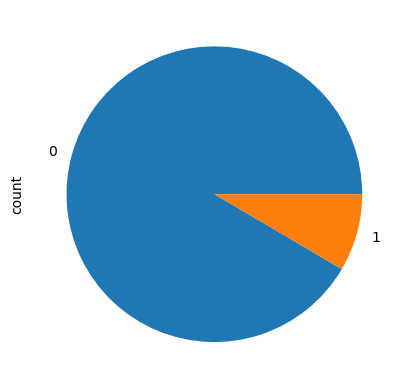

In [4540]:
#  Let us determine the percentage of customers who have churned versus those who have not churned.
print((data_filtered['churn_probability'].value_counts()/len(data))*100)
((data_filtered['churn_probability'].value_counts()/len(data))*100).plot(kind="pie")
plt.show()

### It is evident that a large majority, 97% of customers, do not churn, indicating a potential issue with class imbalance.
- As the target variable, the variable churn, is identified, it is recommended to remove all columns in the dataset that are associated with this variable (i.e., columns with the suffix _8).

In [4541]:
data_filtered.shape

(67500, 141)

In [4542]:
# Selecting all the churn phase columns in order to drop then
churn_phase_cols = [col for col in data_filtered.columns if '_8' in col]
churn_phase_cols

['arpu_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'date_of_last_rech_8',
 'last_day_rch_amt_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'av_rech_amt_data_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'night_pck_user_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'sachet_3g_8',
 'fb_user_8']

In [4543]:
# dropping churn phase columns
data_filtered.drop(churn_phase_cols, axis=1, inplace=True)
data_filtered.shape

(67500, 95)

- The data can still be cleaned by considering a few columns that are related to the positive phase.
- As we previously derived several columns in the earlier favorable phase, we have the option to exclude those associated columns when creating the dataset.

In [4544]:
data_filtered.drop(['av_rech_amt_data_6', 'total_rech_data_6','total_rech_amt_6'], axis=1, inplace=True)

In [4545]:
data_filtered.shape

(67500, 92)

- Let us examine the correlation among the independent variables and eliminate the ones that are highly correlated.

In [4546]:
# finding correlation among variables between 0.80 to -0.80
data_corr = data_filtered.corr()
data_corr.loc[:,:] = np.tril(data_corr, k=-1)
data_corr = data_corr.stack()
data_corr[(data_corr > 0.80) | (data_corr < -0.80)].sort_values(ascending=False)

fb_user_6           night_pck_user_6     0.971672
fb_user_7           night_pck_user_7     0.970347
total_rech_amt_7    arpu_7               0.960223
isd_og_mou_7        isd_og_mou_6         0.950882
sachet_2g_7         total_rech_data_7    0.910313
total_ic_mou_6      loc_ic_mou_6         0.902346
total_ic_mou_7      loc_ic_mou_7         0.890021
std_ic_mou_7        std_ic_t2m_mou_7     0.863272
std_og_t2t_mou_7    onnet_mou_7          0.862818
total_og_mou_7      std_og_mou_7         0.856737
std_og_t2m_mou_7    offnet_mou_7         0.855979
std_og_t2t_mou_6    onnet_mou_6          0.854849
std_ic_mou_6        std_ic_t2m_mou_6     0.854387
av_rech_amt_data_7  max_rech_data_7      0.840553
total_og_mou_6      std_og_mou_6         0.839784
std_og_t2m_mou_6    offnet_mou_6         0.832348
loc_ic_mou_6        loc_ic_t2m_mou_6     0.822317
loc_og_mou_7        loc_og_mou_6         0.817929
loc_og_mou_6        loc_og_t2m_mou_6     0.813772
loc_ic_mou_7        loc_ic_mou_6         0.804496


In [4547]:
# corelation metrics of numerical columns
plt.figure(figsize = (100, 100))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [4548]:
# more than .85 collinearity can be dropped
columns_to_drop=['fb_user_6','fb_user_7','total_rech_amt_7','isd_og_mou_7','sachet_2g_7',
             'total_ic_mou_6','total_ic_mou_7','std_ic_mou_7','std_og_t2t_mou_7','total_og_mou_7',               
               'std_og_t2m_mou_7','std_og_t2t_mou_6','std_ic_mou_6']

In [4549]:
#  dropping columns
data_filtered.drop(columns_to_drop, axis=1, inplace=True)

In [4550]:
data_filtered.shape

(67500, 79)

# EDA

In [4551]:
# creating a new variable 'tenure', by deving aon with number of days
data_filtered['tenure'] = (data_filtered['aon']/30).round(0)

In [4552]:
data_filtered.head()

,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,total_rech_data_7,max_rech_data_6,max_rech_data_7,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,night_pck_user_6,night_pck_user_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,tenure
0,31.277,87.009,48.58,124.38,32.24,96.68,0.00,0.0,0.00,0.0,2.23,0.00,5.29,16.04,0.00,0.00,0.00,0.00,7.53,16.04,18.75,0.00,0.0,65.09,204.99,0.0,8.20,0.63,0.38,0.0,81.21,2.43,3.68,0.83,21.08,0.00,0.00,3.26,24.76,0.00,7.61,7.46,19.96,0.0,0.0,0.0,0.0,0.0,0.0,1.11,0.69,3,2,65,65,65,65,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,-1.0,-1.0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0,65.0
1,0.000,122.787,0.00,0.00,0.00,25.99,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,30.73,0.00,0.0,0.00,1.68,19.09,1.41,18.68,0.35,1.66,3.44,39.44,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,3,4,0,145,0,0,1.0,0.0,145.0,145.0,0.0,352.91,0.0,3.96,-1.0,0.0,0,0,0,0,1,0,0,710,0.0,0.0,0.0,0,24.0
2,60.806,103.176,0.53,15.93,53.99,82.05,0.00,0.0,0.00,0.0,0.53,12.98,24.11,0.00,0.00,0.00,2.14,0.00,24.64,12.98,28.94,0.00,0.0,28.94,84.99,0.0,2.89,1.38,0.00,0.0,56.49,4.51,6.16,89.86,25.18,0.00,0.00,94.38,31.34,11.69,0.00,18.21,2.48,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2,4,70,70,70,50,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,-1.0,-1.0,0,0,0,0,0,0,0,882,0.0,0.0,0.0,0,29.0
3,156.362,205.260,7.26,16.01,68.76,78.48,0.00,0.0,0.00,0.0,6.99,3.94,37.91,44.89,0.00,0.00,0.00,0.00,44.91,48.84,15.33,0.56,0.0,16.16,37.99,0.0,14.95,9.13,0.00,0.0,76.03,24.98,4.84,53.99,44.23,7.23,0.81,86.21,49.89,0.00,0.00,8.89,0.28,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2,4,110,110,110,110,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,-1.0,-1.0,0,0,0,0,0,0,0,982,0.0,0.0,0.0,0,33.0
4,240.708,128.191,21.28,4.83,56.99,38.11,53.64,0.0,15.73,0.0,10.16,4.83,36.74,19.88,11.99,1.23,0.00,9.85,58.91,25.94,4.35,0.00,0.0,4.35,0.00,0.0,0.00,17.00,0.00,0.0,63.26,5.44,1.39,10.58,4.33,5.51,3.63,21.54,9.36,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,13,10,50,41,25,10,7.0,25.0,41.0,191.0,390.8,308.89,0.0,0.00,0.0,0.0,0,0,7,0,0,0,1,647,0.0,0.0,0.0,0,22.0


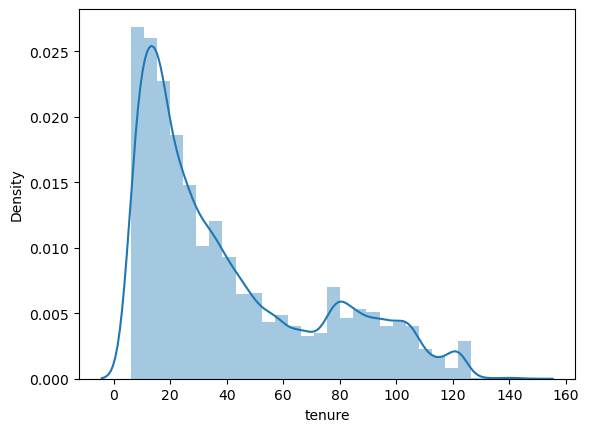

In [4553]:
# Checking the distribution of the Tenure variable
sns.distplot(data_filtered['tenure'],bins=30)
plt.show()

In [4554]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
data_filtered['tenure range'] = pd.cut(data_filtered['tenure'], tn_range, labels=tn_label)
data_filtered['tenure range'].head()

0        NaN
1    1-2 Yrs
2    2-5 Yrs
3    2-5 Yrs
4    1-2 Yrs
Name: tenure range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

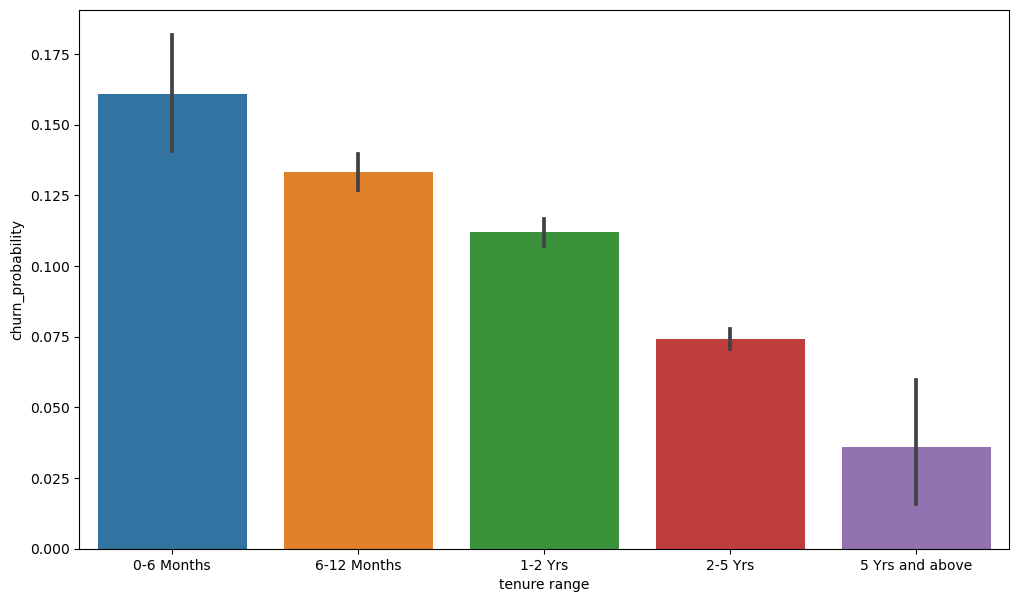

In [4555]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure range', y='churn_probability', data=data_filtered)
plt.show()

In [4556]:
# driopping tenure and tenure range
data_filtered.drop(['tenure range'], axis=1, inplace=True)

- The highest rate of customer turnover occurs within the first 0-6 months, but it steadily declines as the customer remains connected to the network.


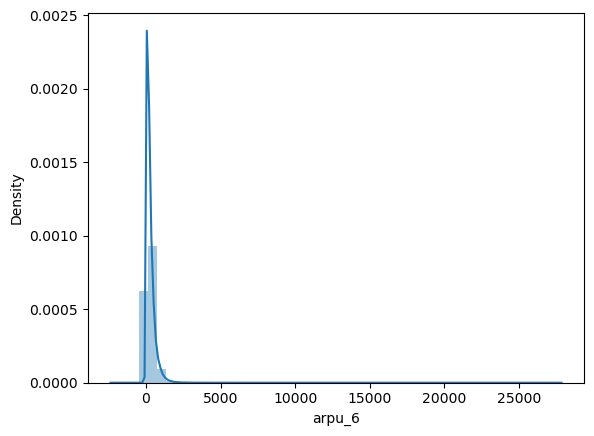

In [4557]:
# Visualizing average revenue per user in good phase month
sns.distplot(data_filtered['arpu_6'])
plt.show()

In [4558]:
data_filtered.head()

,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,total_rech_data_7,max_rech_data_6,max_rech_data_7,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,night_pck_user_6,night_pck_user_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,tenure
0,31.277,87.009,48.58,124.38,32.24,96.68,0.00,0.0,0.00,0.0,2.23,0.00,5.29,16.04,0.00,0.00,0.00,0.00,7.53,16.04,18.75,0.00,0.0,65.09,204.99,0.0,8.20,0.63,0.38,0.0,81.21,2.43,3.68,0.83,21.08,0.00,0.00,3.26,24.76,0.00,7.61,7.46,19.96,0.0,0.0,0.0,0.0,0.0,0.0,1.11,0.69,3,2,65,65,65,65,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,-1.0,-1.0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0,65.0
1,0.000,122.787,0.00,0.00,0.00,25.99,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,30.73,0.00,0.0,0.00,1.68,19.09,1.41,18.68,0.35,1.66,3.44,39.44,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,3,4,0,145,0,0,1.0,0.0,145.0,145.0,0.0,352.91,0.0,3.96,-1.0,0.0,0,0,0,0,1,0,0,710,0.0,0.0,0.0,0,24.0
2,60.806,103.176,0.53,15.93,53.99,82.05,0.00,0.0,0.00,0.0,0.53,12.98,24.11,0.00,0.00,0.00,2.14,0.00,24.64,12.98,28.94,0.00,0.0,28.94,84.99,0.0,2.89,1.38,0.00,0.0,56.49,4.51,6.16,89.86,25.18,0.00,0.00,94.38,31.34,11.69,0.00,18.21,2.48,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2,4,70,70,70,50,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,-1.0,-1.0,0,0,0,0,0,0,0,882,0.0,0.0,0.0,0,29.0
3,156.362,205.260,7.26,16.01,68.76,78.48,0.00,0.0,0.00,0.0,6.99,3.94,37.91,44.89,0.00,0.00,0.00,0.00,44.91,48.84,15.33,0.56,0.0,16.16,37.99,0.0,14.95,9.13,0.00,0.0,76.03,24.98,4.84,53.99,44.23,7.23,0.81,86.21,49.89,0.00,0.00,8.89,0.28,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2,4,110,110,110,110,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,-1.0,-1.0,0,0,0,0,0,0,0,982,0.0,0.0,0.0,0,33.0
4,240.708,128.191,21.28,4.83,56.99,38.11,53.64,0.0,15.73,0.0,10.16,4.83,36.74,19.88,11.99,1.23,0.00,9.85,58.91,25.94,4.35,0.00,0.0,4.35,0.00,0.0,0.00,17.00,0.00,0.0,63.26,5.44,1.39,10.58,4.33,5.51,3.63,21.54,9.36,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,13,10,50,41,25,10,7.0,25.0,41.0,191.0,390.8,308.89,0.0,0.00,0.0,0.0,0,0,7,0,0,0,1,647,0.0,0.0,0.0,0,22.0


Text(0.5, 1.0, 'Features Correlating with Churn variable')

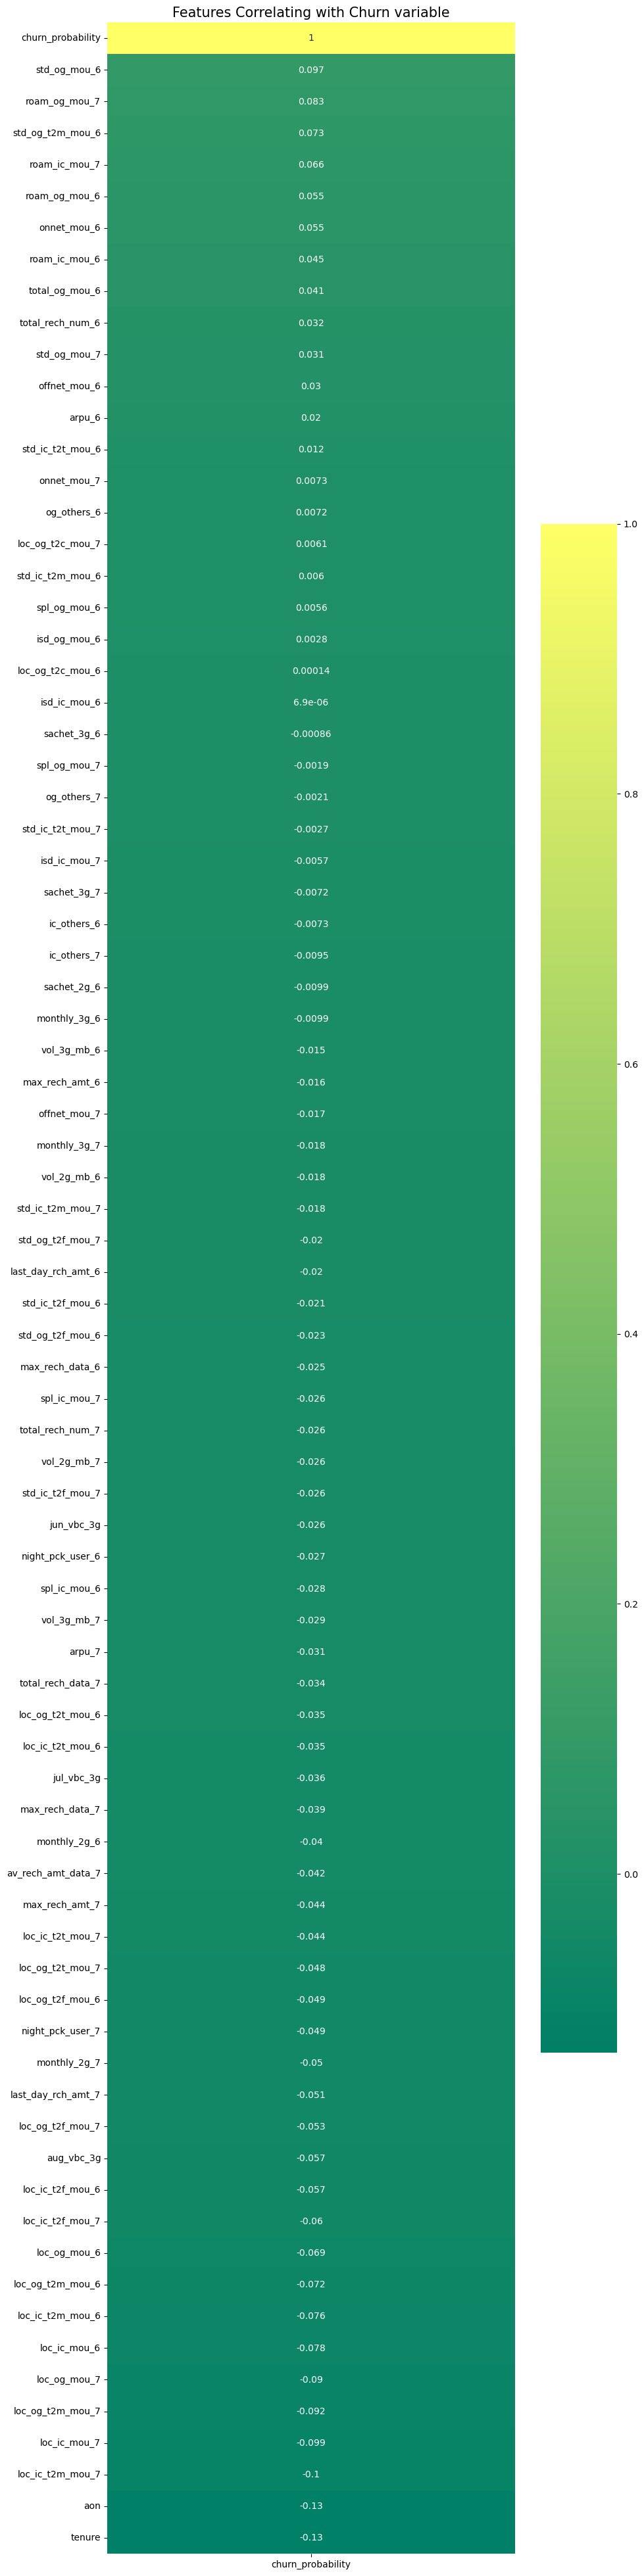

In [4559]:
# Checking Correlation between target variable(SalePrice) with the other variable in the dataset
plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(data_filtered.corr()[['churn_probability']].sort_values(ascending=False, by='churn_probability'),annot=True, 
                                cmap='summer')
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)


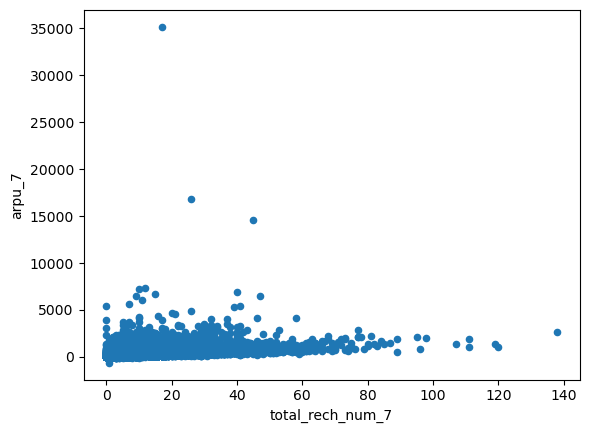

In [4560]:
# Drawing a scatter plot between total recharge and avg revenue for the 7th month
data_filtered[['total_rech_num_7', 'arpu_7']].plot.scatter(x = 'total_rech_num_7', y='arpu_7')
plt.show()

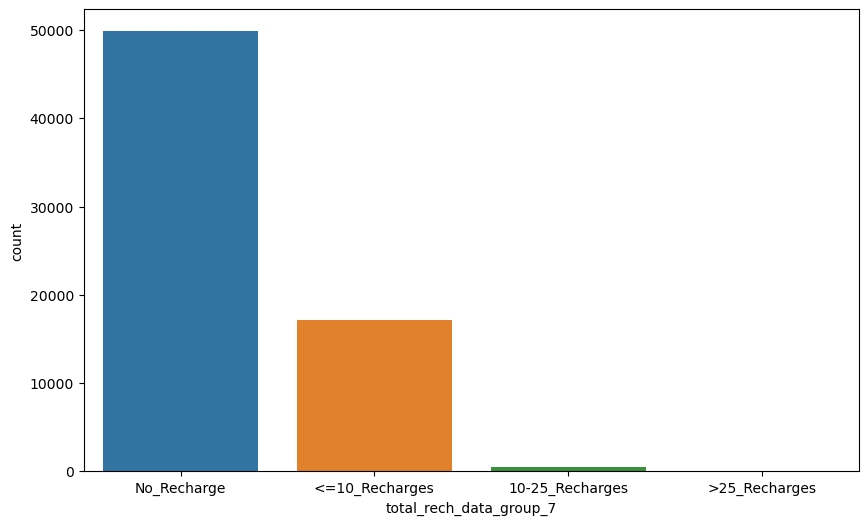

In [4561]:
data_filtered['total_rech_data_group_7'] = pd.cut(
    data_filtered['total_rech_data_7'],
    bins=[-1, 0, 10, 25, 100],
    labels=["No_Recharge", "<=10_Recharges", "10-25_Recharges", ">25_Recharges"]
)

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='total_rech_data_group_7', data=data_filtered)
plt.show()                 

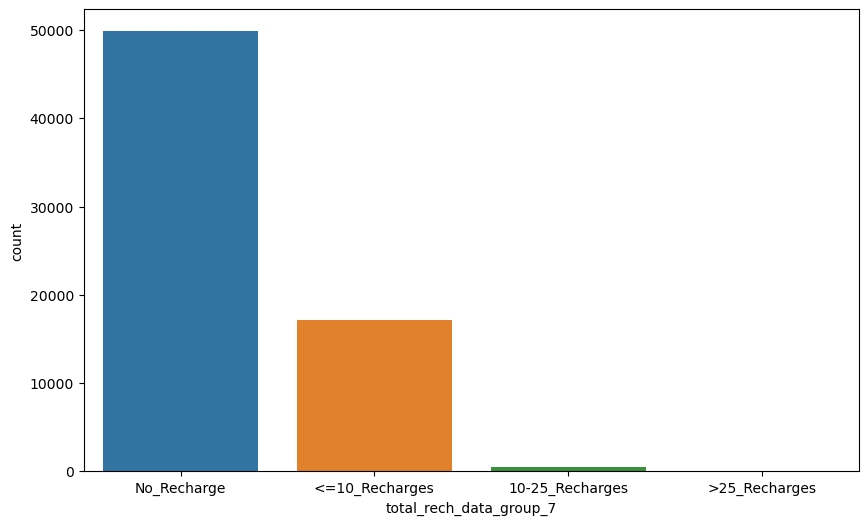

In [4562]:
data_filtered['total_rech_data_group_7'] = pd.cut(
    data_filtered['total_rech_data_7'],
    bins=[-1, 0, 10, 25, 100],
    labels=["No_Recharge", "<=10_Recharges", "10-25_Recharges", ">25_Recharges"]
)

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='total_rech_data_group_7', data=data_filtered)
plt.show()      

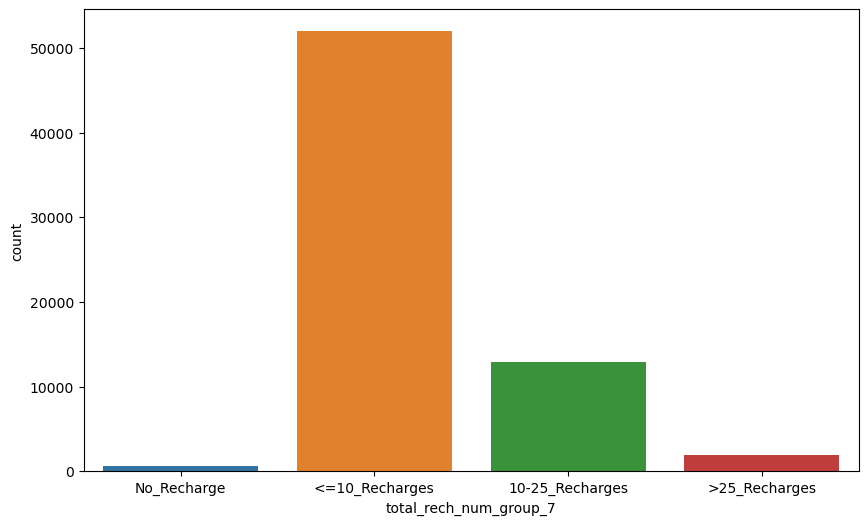

In [4563]:
 data_filtered['total_rech_num_group_7'] = pd.cut(
    data_filtered['total_rech_num_7'],
    bins=[-1,0,10,25,1000],
    labels=["No_Recharge", "<=10_Recharges", "10-25_Recharges", ">25_Recharges"]
)

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='total_rech_num_group_7', data=data_filtered)
plt.show() 

- From above, With an increase in the number of recharge rate, it is evident that the churn rate decreases.

In [4564]:
# dropping above created variables
data_filtered.drop(['total_rech_data_group_7','total_rech_num_group_7',] , axis=1, inplace=True)

In [4565]:
data_filtered.shape

(67500, 80)

In [4566]:
data_filtered.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67500 entries, 0 to 67499
Data columns (total 80 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   arpu_6              67500 non-null  float64
 1   arpu_7              67500 non-null  float64
 2   onnet_mou_6         67500 non-null  float64
 3   onnet_mou_7         67500 non-null  float64
 4   offnet_mou_6        67500 non-null  float64
 5   offnet_mou_7        67500 non-null  float64
 6   roam_ic_mou_6       67500 non-null  float64
 7   roam_ic_mou_7       67500 non-null  float64
 8   roam_og_mou_6       67500 non-null  float64
 9   roam_og_mou_7       67500 non-null  float64
 10  loc_og_t2t_mou_6    67500 non-null  float64
 11  loc_og_t2t_mou_7    67500 non-null  float64
 12  loc_og_t2m_mou_6    67500 non-null  float64
 13  loc_og_t2m_mou_7    67500 non-null  float64
 14  loc_og_t2f_mou_6    67500 non-null  float64
 15  loc_og_t2f_mou_7    67500 non-null  float64
 16  loc_